Name: Nikolaos Katsaidonis

Date: 5/11/2024

Studen of Electrical and Computer Engineering National Technical Universitry Athens

In [2]:
#Loading the dataset
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

#Reading the .csv file
path = '/content/drive/MyDrive/Machine_Learning_Project1/train-val.csv'
data = pd.read_csv(path)


Mounted at /content/drive


In [ ]:
#First 5 rows of our data set
data.head()

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,...,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,...,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,...,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,...,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,...,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


In [ ]:
#2a
#Number of samples (rows) and features (columns)
rows, columns = data.shape
print("The number of samples is {}.\nThe number of features is {}.\n".format(rows, columns))


The number of samples is 7262.
The number of features is 24.



In [ ]:
#2b
#Data type of the features (columns)
features_data_type = data.dtypes
print(f"The columns of the Data Frame are:\n {features_data_type}\n")


The columns of the Data Frame are:
 ID                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object



In [ ]:
#2c
#Labels
features_labels = data.columns
print(f"The features labels are {len(features_labels)}:")
print(features_labels)

The features labels are 24:
Index(['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
#2d
##Categorical features-columns are our classes

'''
print("Categorical features:")
categorical_list=[]
for c in data.select_dtypes(include=['category','object']).columns:
  categorical_list.append(c)
print(categorical_list)
'''
categories= data['RainTomorrow'].nunique()

print("Number of categories  =", (categories))



Number of categories  = 2


In [ ]:
#2e

#Number of samples for each category in column RainTomorrow
samples_count = data['RainTomorrow'].value_counts()

print("Count of samples in each category", samples_count)


Count of samples in each category RainTomorrow
0    5623
1    1639
Name: count, dtype: int64


In [ ]:
#2st
#Correlation of the data
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['float64','int64'])

# Calculate the correlation matrix
correlation = numerical_data.corr()
correlation

#This matrix gives us information about the relation between some features.
#For example, when sunshine is increasing, humidity dicreases by 50%-60%


,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
ID,1.000000,0.101510,0.133521,-0.032217,0.071010,0.051325,0.043297,0.069138,0.030900,-0.117635,-0.075666,-0.084635,-0.089954,-0.071564,-0.064091,0.136345,0.125620,-0.008100,-0.000595
MinTemp,0.101510,1.000000,0.709894,0.093915,0.460272,0.064273,0.165904,0.199696,0.192065,-0.227187,0.023297,-0.366575,-0.378641,0.056189,-0.000523,0.888775,0.679368,0.064523,0.076245
MaxTemp,0.133521,0.709894,1.000000,-0.098454,0.571740,0.469705,0.008927,0.009758,0.057063,-0.485498,-0.493780,-0.217367,-0.326057,-0.315717,-0.314760,0.881857,0.983124,-0.240200,-0.175112
Rainfall,-0.032217,0.093915,-0.098454,1.000000,-0.074776,-0.182762,0.182268,0.127017,0.093557,0.204239,0.235734,-0.192867,-0.133201,0.188081,0.165398,-0.009739,-0.100264,0.508495,0.206823
Evaporation,0.071010,0.460272,0.571740,-0.074776,1.000000,0.348179,0.168108,0.207150,0.135517,-0.502250,-0.373950,-0.208560,-0.244390,-0.193750,-0.196783,0.552718,0.558556,-0.178420,-0.111138
Sunshine,0.051325,0.064273,0.469705,-0.182762,0.348179,1.000000,-0.068132,0.020779,0.047236,-0.463217,-0.621705,0.093877,0.025512,-0.690637,-0.715964,0.295746,0.494379,-0.283477,-0.433374
WindGustSpeed,0.043297,0.165904,0.008927,0.182268,0.168108,-0.068132,1.000000,0.630244,0.706897,-0.218186,0.008154,-0.496235,-0.445468,0.087869,0.140471,0.127086,-0.028502,0.201441,0.291813
WindSpeed9am,0.069138,0.199696,0.009758,0.127017,0.207150,0.020779,0.630244,1.000000,0.543124,-0.299031,-0.033898,-0.263245,-0.209356,0.034047,0.061122,0.144137,-0.006178,0.127078,0.109336
WindSpeed3pm,0.030900,0.192065,0.057063,0.093557,0.135517,0.047236,0.706897,0.543124,1.000000,-0.167797,0.002906,-0.335823,-0.297948,0.063603,0.059018,0.176276,0.028872,0.119698,0.137652
Humidity9am,-0.117635,-0.227187,-0.485498,0.204239,-0.502250,-0.463217,-0.218186,-0.299031,-0.167797,1.000000,0.647581,0.124066,0.179100,0.442494,0.366222,-0.475319,-0.475040,0.333259,0.230218


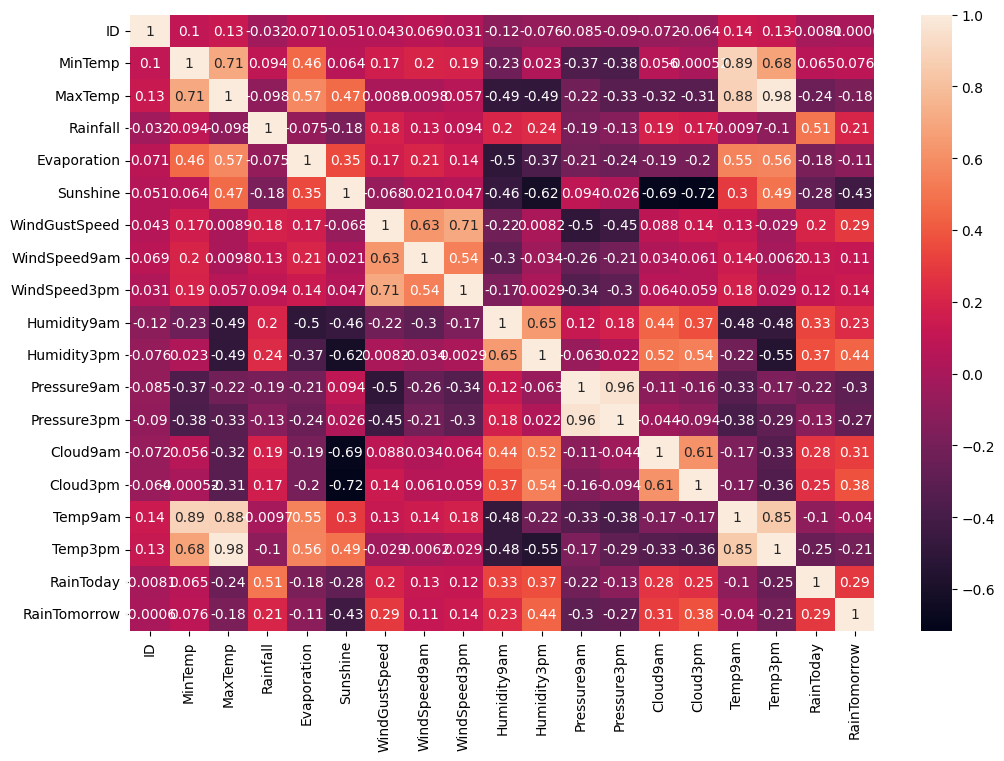

In [ ]:
#We can also print a heatmap for the correlation matrix
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot = True)
plt.show()

In [ ]:
#2z
#Some extra things to understand our data set
data.describe()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,7262.000000,7237.000000,7251.000000,7262.000000,4223.000000,3817.000000,6789.000000,7207.000000,7128.000000,7185.000000,7094.000000,6576.000000,6575.000000,4592.000000,4443.000000,7228.000000,7142.000000,7262.000000,7262.000000
mean,4849.619113,10.638345,21.524562,2.302782,4.699005,7.356930,39.160701,13.674622,18.227273,70.242171,52.359459,1018.909367,1016.469262,4.368467,4.489534,15.426204,20.081686,0.228863,0.225695
std,2787.027799,5.994250,6.482395,8.027407,3.761805,3.539593,13.846248,8.918759,8.858489,18.807468,20.012168,7.061870,6.988741,2.909982,2.714390,6.079540,6.367390,0.420130,0.418068
min,2.000000,-7.600000,-3.700000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,1.000000,990.800000,989.900000,0.000000,0.000000,-5.200000,-4.100000,0.000000,0.000000
25%,2441.500000,6.400000,16.900000,0.000000,2.200000,4.900000,30.000000,7.000000,11.000000,58.000000,38.000000,1014.300000,1011.800000,1.000000,2.000000,11.200000,15.600000,0.000000,0.000000
50%,4857.000000,10.300000,20.800000,0.000000,4.000000,8.200000,37.000000,13.000000,17.000000,71.000000,53.000000,1019.000000,1016.600000,5.000000,5.000000,14.900000,19.300000,0.000000,0.000000
75%,7245.750000,14.500000,25.800000,0.800000,6.400000,10.200000,46.000000,19.000000,24.000000,85.000000,66.000000,1023.600000,1021.200000,7.000000,7.000000,19.300000,24.200000,0.000000,0.000000
max,9683.000000,28.100000,42.800000,174.600000,50.800000,13.600000,104.000000,65.000000,83.000000,100.000000,100.000000,1040.200000,1036.700000,8.000000,9.000000,36.500000,41.700000,1.000000,1.000000


In [ ]:
#3a

# NOW THAT WE REPLACED NULL VALUES, BACK TO 3a

#First of all, we will keep from date only the month
#and we will replace the column Date with the column Month which is a more
#usefull information for weather predictions

#Creating functions as we will use it for the test data set too!
def ONLY_MONTH(data_frame):
  # Extract month part and conert it to float so its numerical feature
  data_frame['Month'] = data_frame['Date'].apply(lambda x: float(x.split("-")[1]))
  data_frame = data_frame.drop(columns=['Date'])
  return data_frame


#We saw that the columns concatenations didnt help us to get better results so we do not apply concatenation.
#Moreover, we tried to drop the columns with the lowest correlation with column 'RainTomorrow' but we didnt get better results too
'''
def CONCATENATE(data_frame):
    # Average Temperature
    data_frame['TempDiff'] = (data_frame['MaxTemp'] + data_frame['MinTemp']) / 2
    # Average Cloud Cover
    data_frame['CloudDiff'] = (data_frame['Cloud3pm'] + data_frame['Cloud9am']) / 2
    # Average Humidity
    data_frame['HumidityDiff'] = (data_frame['Humidity3pm'] + data_frame['Humidity9am']) / 2
    # Average Pressure
    data_frame['PressureDiff'] = (data_frame['Pressure3pm'] + data_frame['Pressure9am']) / 2

    # Drop the original columns
    data_frame = data_frame.drop(columns=['Cloud3pm', 'Cloud9am', 'Humidity3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am'])
    return data_frame
'''

#Apply the function on our data
data = ONLY_MONTH(data)
print(data.columns)

Index(['ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month'],
      dtype='object')


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [ ]:
#3b
#Checking for the missing values
print("Missing values for each feature:")
data.isnull().sum()


Missing values for each feature:


,0
ID,0
Location,0
MinTemp,25
MaxTemp,11
Rainfall,0
Evaporation,3039
Sunshine,3445
WindGustDir,475
WindGustSpeed,473
WindDir9am,570


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Numerical features transformer
numerical_list = data.select_dtypes(include = ['float64', 'int64']).columns.tolist()
if 'RainTomorrow' in numerical_list:
  numerical_list.remove('RainTomorrow')
numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler())])

#Categorical features transformer
categorical_list = data.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('imputer', KNNImputer(n_neighbors=20, weights="uniform"))])

In [ ]:
#We applied one hot encoding for categorical features and we filled the null values for all the features as well, in the cell above

In [ ]:
#Scaling implemented below in the PREPROCESSOR

In [ ]:
from sklearn.compose import ColumnTransformer

#Transformer
PREPROCESSOR = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_list),
        ('weather', categorical_transformer, categorical_list)])

#Apply the Transformer on data
processed_data = PREPROCESSOR.fit_transform(data)

#Cleaned data to Data frame with the appropriate columns
correct_columns = (numerical_list + list(PREPROCESSOR.named_transformers_['weather']['encoder'].get_feature_names_out(categorical_list)))
processed_data = pd.DataFrame(processed_data, columns=correct_columns)
#Add back RainTomorrow
processed_data['RainTomorrow'] = data['RainTomorrow']


In [ ]:
processed_data.head()

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainTomorrow
0,-0.511914,0.627454,1.647612,1.083515,0.350843,0.864659,-1.230930,-1.538087,-0.817598,0.570061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.446880,0.059821,-0.003172,-0.286885,-0.057833,0.165978,0.298284,0.149068,1.340319,-0.335338,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.595580,-0.390946,-1.052269,-0.286885,-0.579023,0.096160,-1.085291,-0.075886,-1.271896,0.463543,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.620698,-0.307471,1.647612,-0.286885,0.812600,1.481515,-0.138634,-1.313133,-0.363299,-0.282080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.992028,-0.574592,-0.820851,-0.286885,-0.215748,-0.210942,0.850189,1.611269,0.886021,-0.814667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# As we can see, after encoding, all the features have became numerical and there are far more columns as the categories of each categorical feature became columns themselves. So, we "cleared" our data set!

In [ ]:
#3b
#Checking for the missing values
print("Missing values disappeared:")
processed_data.isnull().sum()

Missing values disappeared:


,0
ID,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
...,...
WindDir3pm_W,0
WindDir3pm_WNW,0
WindDir3pm_WSW,0
WindDir3pm_nan,0


In [ ]:
#3st

from sklearn.model_selection import train_test_split

y = processed_data['RainTomorrow'] #Target is the column "RainTomorrow"
X = processed_data.drop(columns=['RainTomorrow']) #Input are all the other columns


In [ ]:
#3z

#70% of the data set is train set and 30% is validation set.
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.30, random_state=68)


### Training the model with default parameter values for the classifiers.

We will train the following classifiers using our training dataset:

1) Naive Bayes

2) KNeighborsClassifier

3) LogisticRegression

4) MLP with one hidden layer

5) SVC

6) Decision Tree

7) Random Forest

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#4a

#Initialisation of the classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(), #default n_neighbors=5
    "Logistic Regression": LogisticRegression(random_state=68),
    "MLP (1 Hidden Layer)": MLPClassifier(random_state=68),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=68),
    "Random Forest": RandomForestClassifier(random_state=68)
}

#Loop that iterates over various classifiers and train them on our data
for classifier in classifiers.values():
  classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
#4b

#Dictionary to store predictions for each classifier
predictions={}

#Predictions on the validation set without providing the labels (y_val)
for name,classifier in classifiers.items():
  predictions[name] = classifier.predict(X_val)



In [ ]:
#4c
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#Dictionary to store f1 scores for each classifier
f1_scores = {}

#We have binary classification rain(1)/not rain(0)
#So we dont need to set micro,macro or weighted in f1_score
for name,prediction in predictions.items():
  f1_scores[name] = f1_score(y_val,prediction)

#Printing F1 scores for each classifier
print("F1 SCORES:")
for name,f1 in f1_scores.items():
  print(f"{name}: F1 score = {f1}\n")

print(sum(f1_scores.values())/len(f1_scores))

F1 SCORES:
Naive Bayes: F1 score = 0.4504983388704319

KNeighborsClassifier: F1 score = 0.5915492957746479

Logistic Regression: F1 score = 0.6054181389870436

MLP (1 Hidden Layer): F1 score = 0.627906976744186

SVC: F1 score = 0.6212664277180406

Decision Tree: F1 score = 0.54421768707483

Random Forest: F1 score = 0.58679706601467

0.5753791330262644


In [ ]:
#4c

#Best Classifier
best_classifier = max(f1_scores, key=f1_scores.get)
print(f"The classifier with the best F1 score is {best_classifier} with F1 score = {f1_scores[best_classifier]}")


The classifier with the best F1 score is MLP (1 Hidden Layer) with F1 score = 0.627906976744186


<ipython-input-191-bf52c725ea7c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='coolwarm')


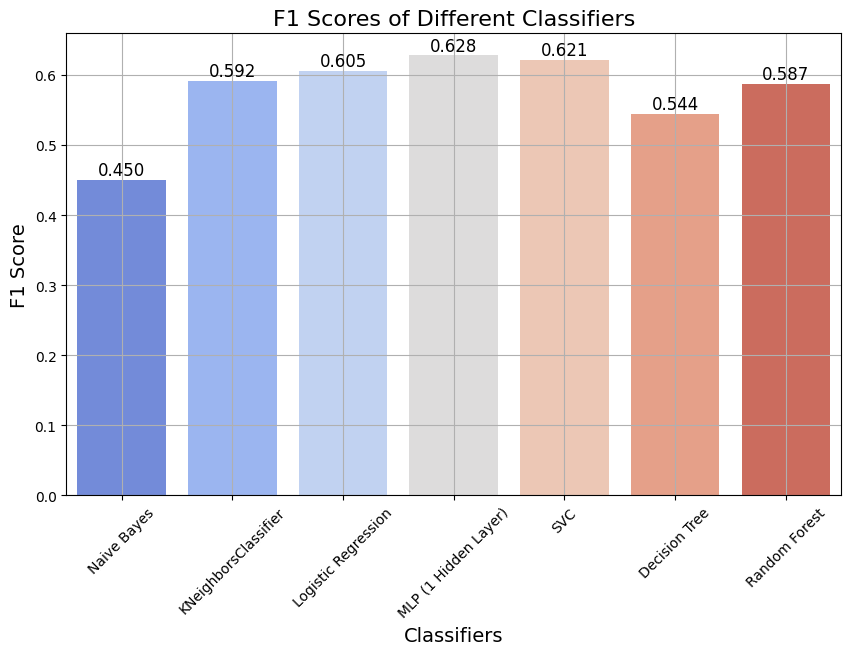

In [ ]:
#4d
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='coolwarm')
plt.title('F1 Scores of Different Classifiers', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, (name, score) in enumerate(f1_scores.items()):
    plt.text(i, score + 0.001, f'{score:.3f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()




We will now use only the model with the best performance to make predictions using the provided test dataset.

In [ ]:
#5a

model=classifiers[best_classifier]
path2 = '/content/drive/MyDrive/Machine_Learning_Project1/test.csv'
test_data = pd.read_csv(path2)

###################################################### Data process we did in the previous data #####################################################################################

test_data = ONLY_MONTH(test_data)
processed_test_data = PREPROCESSOR.fit_transform(test_data)

###################################################### Data process we did in the previous features #####################################################################################

best_classifier_prediction = model.predict(processed_test_data)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#5b

#Keeping the ID column from test_data
ID_column = test_data['ID']

#We create a new DataFrame with ID and predictions
results1 = pd.DataFrame({
    'ID': ID_column,
    'RainTomorrow': best_classifier_prediction
})

#Path to save
path3 = '/content/drive/MyDrive/Machine_Learning_Project1/5b_new_results.csv'

# Save the DataFrame to CSV
results1.to_csv(path3, index=False)

### Model Optimization by Finding the Best Hyperparameters for the Classifiers

 For the seven classifiers, optimize their performance using grid search with cross-validation (5-fold) to determine the optimal hyperparameters

In [ ]:
#6a

from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define hyperparameter grids for each classifier
param_grids = {
    "Naive Bayes": {
        'var_smoothing': np.logspace(0, -9, num=100)
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29,31],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga','lbfgs'],
        'penalty': ['l1', 'l2']
    },
    "MLP (1 Hidden Layer)": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    },
    "SVC": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "Decision Tree": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 5],
        'max_depth': [None,5, 10, 20, 30]
    }
}

# Loop over each classifier to perform GridSearchCV
for name, clf in classifiers.items():
    print(f"\nRunning Grid Search for {name}...")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)


Running Grid Search for Naive Bayes...
Best parameters found:  {'var_smoothing': 1.0}
Best cross-validation score:  0.8154627242391161

Running Grid Search for KNeighborsClassifier...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score:  0.8378901199296991

Running Grid Search for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters found:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score:  0.8461535781478643

Running Grid Search for MLP (1 Hidden Layer)...
Best parameters found:  {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
Best cross-validation score:  0.8428117668919703

Running Grid Search for SVC...
Best parameters found:  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score:  0.8536288605517232

Running Grid Search for Decision Tree...
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best cross-validation score:  0.8070018349476227

Running Grid Search for Random Forest...
Best parameters found:  {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  0.8471380236762439


6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [ ]:
#6b

#Initialisation of the classifiers with the parameters we got
classifiers2 = {
    "Naive Bayes": GaussianNB(var_smoothing=1.0),
    "KNeighborsClassifier": KNeighborsClassifier(metric='manhattan',n_neighbors=15, weights='distance'),
    "Logistic Regression": LogisticRegression(C=1, penalty='l1', solver='liblinear',random_state=68),
    "MLP (1 Hidden Layer)": MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50,), learning_rate='constant',random_state=68),
    "SVC": SVC(C=10, gamma='auto',kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth= 10, min_samples_split=2,random_state=68),
    "Random Forest": RandomForestClassifier(criterion='entropy',max_depth=30, max_features='sqrt', n_estimators=100,min_samples_split=2,random_state=68)
}

#Loop that iterates over various classifiers and train them on our data
for classifier in classifiers2.values():
  classifier.fit(X_train,y_train)

In [ ]:
#Dictionary to store predictions for each classifier
predictions2={}

#Predictions on the validation set without providing the labels (y_val)
for name,classifier in classifiers2.items():
  predictions2[name] = classifier.predict(X_val)


In [ ]:
#6c

#Dictionary to store f1 scores for each classifier
f1_scores2 = {}
#We have binary classification rain(1)/not rain(0)
#So we dont need to set micro,macro or weighted in f1_score
for name,prediction in predictions2.items():
  f1_scores2[name] = f1_score(y_val,prediction)

#Printing F1 scores for each classifier
print("F1 SCORES:")
for name,f1 in f1_scores2.items():
  print(f"{name}: F1 score = {f1}\n")

print(sum(f1_scores2.values())/len(f1_scores2))

F1 SCORES:
Naive Bayes: F1 score = 0.6107030430220357

KNeighborsClassifier: F1 score = 0.5518134715025906

Logistic Regression: F1 score = 0.6042654028436019

MLP (1 Hidden Layer): F1 score = 0.6111111111111112

SVC: F1 score = 0.6159334126040428

Decision Tree: F1 score = 0.5858798735511064

Random Forest: F1 score = 0.5973072215422277

0.5967162194538166


In [ ]:
#Best Classifier
best_classifier = max(f1_scores2, key=f1_scores.get)
print(f"The classifier with the best F1 score is {best_classifier} with F1 score = {f1_scores2[best_classifier]}")

The classifier with the best F1 score is MLP (1 Hidden Layer) with F1 score = 0.6111111111111112


<ipython-input-206-76960ff03c73>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores2.keys()), y=list(f1_scores2.values()), palette='coolwarm')


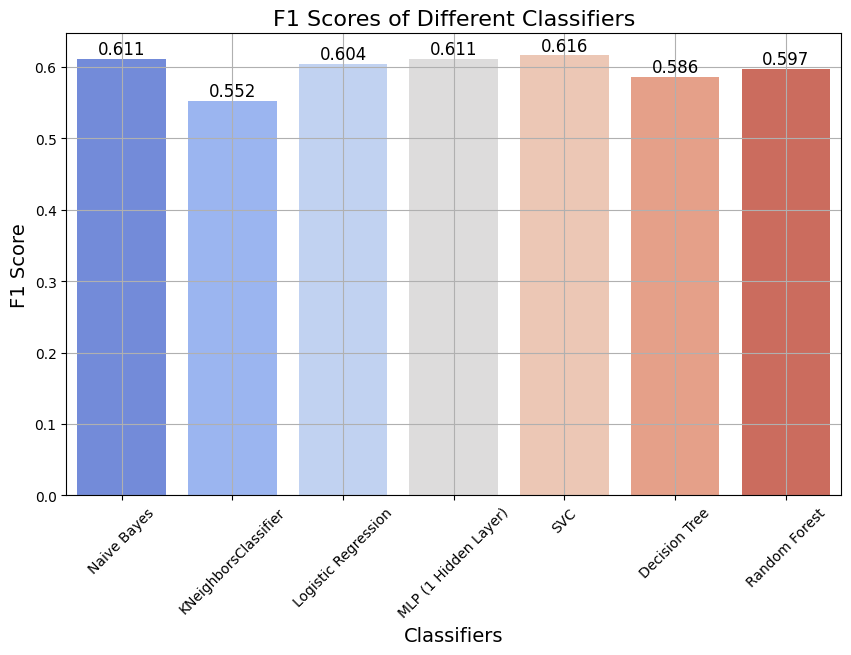

In [ ]:
#6d
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores2.keys()), y=list(f1_scores2.values()), palette='coolwarm')
plt.title('F1 Scores of Different Classifiers', fontsize=16)
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

for i, (name, score) in enumerate(f1_scores2.items()):
    plt.text(i, score + 0.001, f'{score:.3f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

We will now use only the model with the best performance to make predictions using the provided test dataset.

In [ ]:
#7a

model2=classifiers2[best_classifier]
best_classifier_prediction2 = model2.predict(processed_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#7b

#Keeping the ID column from test_data
ID_column = test_data['ID']

#We create a new DataFrame with ID and predictions
results2 = pd.DataFrame({
    'ID': ID_column,
    'RainTomorrow': best_classifier_prediction2
})

#Path to save
path4 = '/content/drive/MyDrive/Machine_Learning_Project1/7b_new_results.csv'

# Save the DataFrame to CSV
results2.to_csv(path4, index=False)